<a href="https://colab.research.google.com/github/kwanqing/CMPE-257-Fall23-Jeffrey-Ong/blob/homework-1/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('ZipDigits.info')
df.head()

,Normalized handwritten digits,automatically
0,scanned from envelopes by the U.S. Postal Serv...,NaN
1,scanned digits are binary and of different siz...,NaN
2,images here have been deslanted and size norm...,resulting
3,in 16 x 16 grayscale images (Le Cun et al.,1990).
4,The data are in two gzipped files,and each line consists of the digit


In [8]:
# Load the training and testing datasets
train_data = pd.read_csv('ZipDigits.train', header=None, sep=' ')
test_data = pd.read_csv('ZipDigits.test', header=None, sep=' ')

In [14]:
# Filter the training and testing datasets
n1 = 1
n2 = 5
train_data_filtered = train_data[(train_data[0] == n1) | (train_data[0] == n2)]
test_data_filtered = test_data[(test_data[0] == n1) | (test_data[0] == n2)]

# Drop the column containing NaN values
train_data_filtered = train_data_filtered.dropna(axis=1)
test_data_filtered = test_data_filtered.dropna(axis=1)

In [15]:
def plot_digit(ax, data, label):
    image = data.reshape(16, 16)
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')

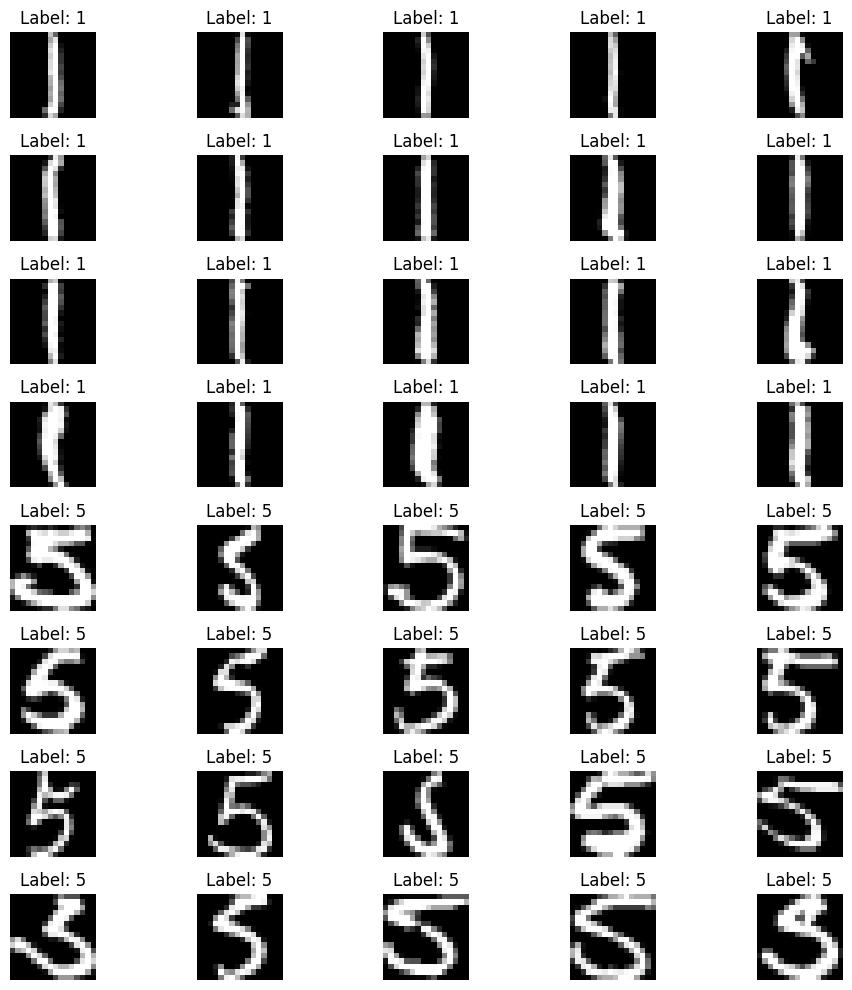

In [16]:
fig, axes = plt.subplots(8, 5, figsize=(10, 10))

counter = 0
for label in [n1, n2]:
    subset = train_data_filtered[train_data_filtered[0] == label]
    for i, row in subset.head(20).iterrows():
        ax = axes[counter // 5, counter % 5]
        plot_digit(ax, row.values[1:], label)
        counter += 1

plt.tight_layout()
plt.show()

In [17]:
# Convert labels to binary classification
train_data_filtered[0] = train_data_filtered[0].apply(lambda x: 1 if x == n1 else -1)
test_data_filtered[0] = test_data_filtered[0].apply(lambda x: 1 if x == n1 else -1)

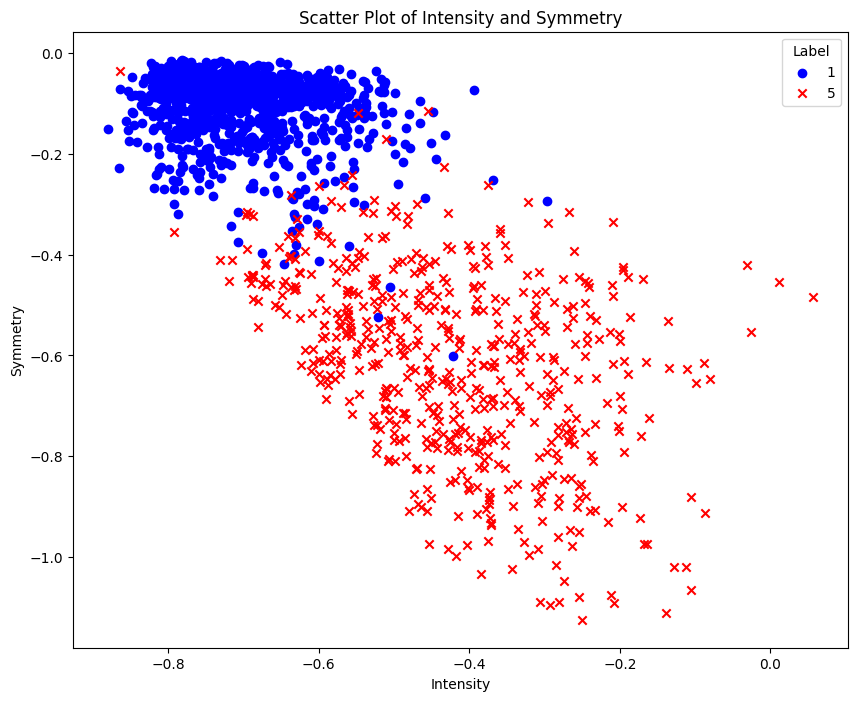

In [19]:
intensity_list = []
symmetry_list = []
labels = []

for index, row in train_data_filtered.iterrows():
    label = row[0]
    pixels = row[1:].values

    # Find the intensity
    intensity = np.mean(pixels)

    # Find the symmetry
    left_half = pixels[:128]
    right_half = np.flip(pixels[128:])
    symmetry = -np.mean(np.abs(left_half - right_half))

    intensity_list.append(intensity)
    symmetry_list.append(symmetry)
    labels.append(label)

plt.figure(figsize=(10, 8))

plt.scatter([intensity_list[i] for i in range(len(labels)) if labels[i] == 1],
            [symmetry_list[i] for i in range(len(labels)) if labels[i] == 1],
            label='1', color='blue', marker='o')

plt.scatter([intensity_list[i] for i in range(len(labels)) if labels[i] == -1],
            [symmetry_list[i] for i in range(len(labels)) if labels[i] == -1],
            label='5', color='red', marker='x')

plt.xlabel('Intensity')
plt.ylabel('Symmetry')
plt.title('Scatter Plot of Intensity and Symmetry')
plt.legend(title='Label')
plt.show()